# POC Student Performance
- Author: Geoffrey HARRAZI
- Date: 27/12/2021
- For: Ekinox

## Test technique:

Face à la chute du niveau scolaire constaté à la suite de la fermeture des écoles, le *Ministério da Educação (*Ministère de l'Éducation portugais) vous contacte, avec l'idée d'utiliser "l'Intelligence Artificielle" pour tenter de remédier à la situation.
Le Ministère souhaiterait disposer d'un outil qui permettrait de fournir des conseils personnalisés à transmettre à chaque étudiant·e en vue d'améliorer son niveau scolaire. Cet outil devra aussi permettre au personnel d'établissement de prioriser ces actions de conseil et d'accompagnement en fonction de leur impact potentiel et du niveau scolaire actuel des étudiants concernés.

Votre mission, si vous l'acceptez, est de démontrer à la personne en charge de ce projet la faisabilité et l'intérêt (ou non) d'utiliser le Machine Learning pour ce cas d'usage ; ainsi que d'être prêt·e, au cas où il y aurait effectivement un intérêt, à développer très rapidement une première application pouvant être utilisée par deux écoles pilotes.

Afin de vous aider dans cette tâche, vous pourrez vous appuyer sur les résultats scolaires en mathématiques et en portugais des étudiants de deux écoles pilotes, ainsi que sur les réponses à un questionnaire qui leur a été transmis préalablement.

Source des données : https://archive.ics.uci.edu/ml/datasets/Student+Performance



In [1]:
#Import
from mylib import get_feature_names, show_values
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

from sklearn.pipeline import Pipeline
from sklearn.utils import class_weight
from sklearn.model_selection import cross_validate, train_test_split, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import pycaret
from pycaret.regression import setup, compare_models, create_model, evaluate_model


### Attribute Information:

#### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1. **school** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. **sex** - student's sex (binary: 'F' - female or 'M' - male)
3. **age** - student's age (numeric: from 15 to 22)
4. **address** - student's home address type (binary: 'U' - urban or 'R' - rural)
5. **famsize** - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. **Pstatus** - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. **Medu** - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. **Fedu** - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. **Mjob** - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. **Fjob** - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. **reason** - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. **guardian** - student's guardian (nominal: 'mother', 'father' or 'other')
13. **traveltime** - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. **studytime** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. **failures** - number of past class failures (numeric: n if 1<=n<3, else 4)
16. **schoolsup** - extra educational support (binary: yes or no)
17. **famsup** - family educational support (binary: yes or no)
18. **paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. **activities** - extra-curricular activities (binary: yes or no)
20. **nursery** - attended nursery school (binary: yes or no)
21. **higher** - wants to take higher education (binary: yes or no)
22. **internet** **- Internet access at home (binary: yes or no)
23. **romantic** - with a romantic relationship (binary: yes or no)
24. **famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. **freetime** - free time after school (numeric: from 1 - very low to 5 - very high)
26. **goout** - going out with friends (numeric: from 1 - very low to 5 - very high)
27. **Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. **Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. **health** - current health status (numeric: from 1 - very bad to 5 - very good)
30. **absences** - number of school absences (numeric: from 0 to 93)

#### these grades are related with the course subject, Math or Portuguese:
31. **G1** - first period grade (numeric: from 0 to 20)
32. **G2** - second period grade (numeric: from 0 to 20)
33. **G3** - final grade (numeric: from 0 to 20, output target)



## Get Data

In [2]:
#Import data
student_mat = pd.read_csv("data/student-mat.csv", sep=";")
student_por = pd.read_csv("data/student-por.csv", sep=";")

In [3]:
#student_mat
print("Mathematics class")
print("Number of records: {}".format(student_mat.shape[0]))
student_mat.head()

Mathematics class
Number of records: 395


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [4]:
#student_por
print("Portugese class")
print("Number of records: {}".format(student_por.shape[0]))
student_por.head()

Portugese class
Number of records: 649


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


I am merging the datasets and I will use the data from the Portuguese and Math classes without distinction for the analysis.

In [5]:
#student_merge
print("Merged dataset")
student_merge = pd.concat([student_mat,student_por])
print("Number of records: {}".format(student_merge.shape[0]))
student_merge.head()

Merged dataset
Number of records: 1044


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


## Basic Analysis

In [6]:
student_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

In [7]:
for col in student_merge:
    #if student_merge[col].dtypes == object:
    print("Column: {} - Unique values: {}".format(col, np.sort(student_merge[col].unique())))

Column: school - Unique values: ['GP' 'MS']
Column: sex - Unique values: ['F' 'M']
Column: age - Unique values: [15 16 17 18 19 20 21 22]
Column: address - Unique values: ['R' 'U']
Column: famsize - Unique values: ['GT3' 'LE3']
Column: Pstatus - Unique values: ['A' 'T']
Column: Medu - Unique values: [0 1 2 3 4]
Column: Fedu - Unique values: [0 1 2 3 4]
Column: Mjob - Unique values: ['at_home' 'health' 'other' 'services' 'teacher']
Column: Fjob - Unique values: ['at_home' 'health' 'other' 'services' 'teacher']
Column: reason - Unique values: ['course' 'home' 'other' 'reputation']
Column: guardian - Unique values: ['father' 'mother' 'other']
Column: traveltime - Unique values: [1 2 3 4]
Column: studytime - Unique values: [1 2 3 4]
Column: failures - Unique values: [0 1 2 3]
Column: schoolsup - Unique values: ['no' 'yes']
Column: famsup - Unique values: ['no' 'yes']
Column: paid - Unique values: ['no' 'yes']
Column: activities - Unique values: ['no' 'yes']
Column: nursery - Unique values:

- The dataset is really clean, without missing values. 
- The features are a mix of numerical and categorical values
- Among the numerical features "absences", "G1", "G2" and "G3" are the only with a large sets of values

Text(0.5, 1.0, 'Correlation between features')

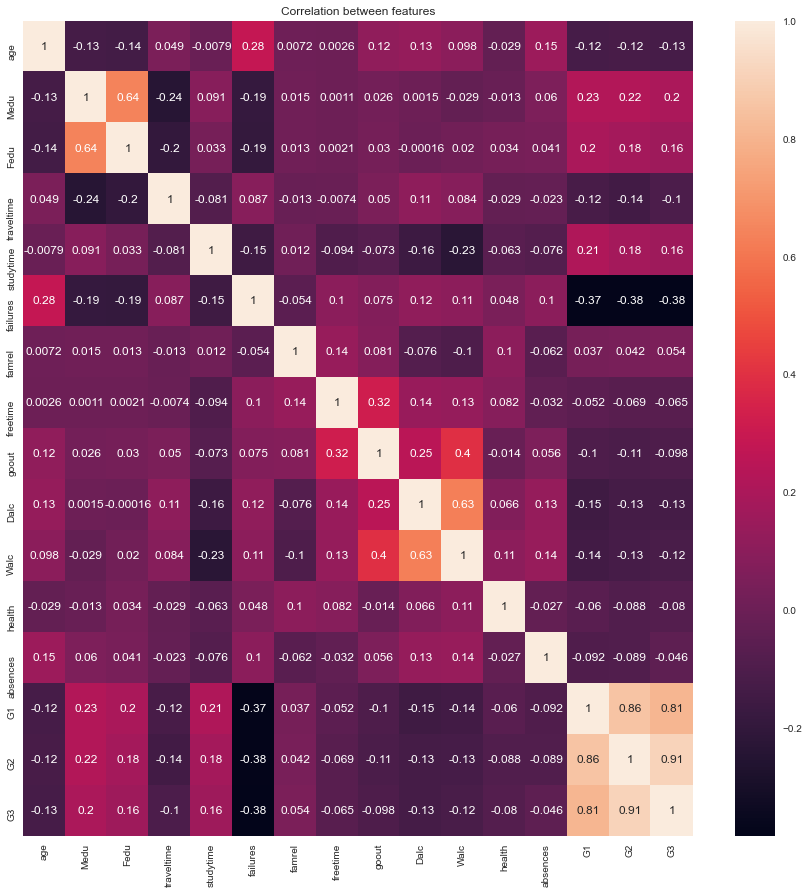

In [8]:
corr = student_merge.corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(corr, annot=True)
ax.set_title('Correlation between features')

Here are some quick insights taken from this heatmap:
1. Mother and Father activities are correlated
2. Mother's education has a greater influence on the child's grades than the father's one 
3. The previous class faillure is strongly negatively correlated with the current grade
4. Going out and the general alcohol consumption are correlated
5. Week-end alcohol consumption decreases the study time
5. G1 and G2 are strongly correlated with G3, because they are used to calculate G3
6. Not surprising: Age is correlated with failure





In [9]:
#Remove G1 and G2 & create a categorical features based on grade
student_merge2 = student_merge.drop(["G1","G2"], axis=1)
student_merge2.loc[(student_merge2.G3 >= 10), 'pass_fail'] = 'pass' 
student_merge2.loc[(student_merge2.G3 < 10), 'pass_fail'] = 'fail' 

The target variables will be the final grade ("G3"). I remove the first and second period grade features since they are used to calculate "G3". I also create a categorical target variable out of "G3".
I assume that
- Final grade less than 10, results in a fail
- Final grade greater or equal to 10, results in passing the class

This assumption facilitates the POC and highlights which factors can lead to failing a class, as well as which advices can be given to students.

##### Focus on target variables

Text(0.5, 1.0, 'Numeric grades boxplot')

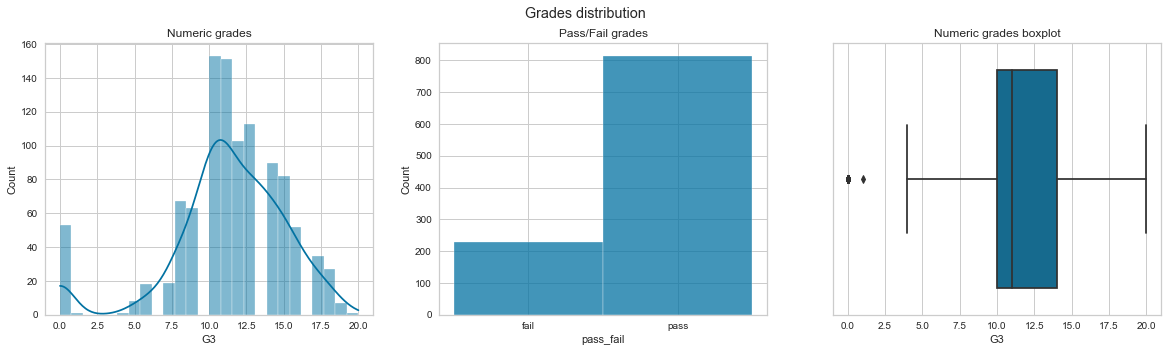

In [10]:
#Distribution numeric grade and pass_fail
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Grades distribution')
# Numeric grades
sns.histplot(student_merge2.G3, kde=True, ax=axes[0])
axes[0].set_title("Numeric grades")
# Pass fail grades
sns.histplot(student_merge2.pass_fail, ax=axes[1])
axes[1].set_title("Pass/Fail grades")
#Numeric grades boxplot
sns.boxplot(data=student_merge2, x="G3", ax=axes[2])
axes[2].set_title("Numeric grades boxplot")


In [11]:
#balance pass_fail
student_merge2.pass_fail.value_counts()
print("Ratio pass_fail grade: {:.2f} time more pass than fail".format((student_merge2.pass_fail.value_counts()[0]/student_merge2.pass_fail.value_counts()[1])))

Ratio pass_fail grade: 3.54 time more pass than fail


- The numeric grades are pretty well distributed (not skewed etc.). 
- We can identify grades clusters. We could divide the grades as A, B, C, D ...
- Grades equal to 0 can be outliers (maybe students who dropped out).
- Fail and pass categories aren't balanced (Luckily we have many more successful students :) ). 

## Complete analysis

##### Initial hypothesis:
- Positive impact on grade/success
    - Mother's & father's educations
    - Study time
    - Extra educational support
    - Family educational support
    - Extra-curricular activities
    - Wants to have higher education
    - Internet access at home
    - Good family relationships
- Negative impact on grade/success
    - Travel time
    - Number of faillures
    - In a romantic relationship
    - Going out with friends
    - Alcohol consumption
    - Absences

##### Features analysis

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


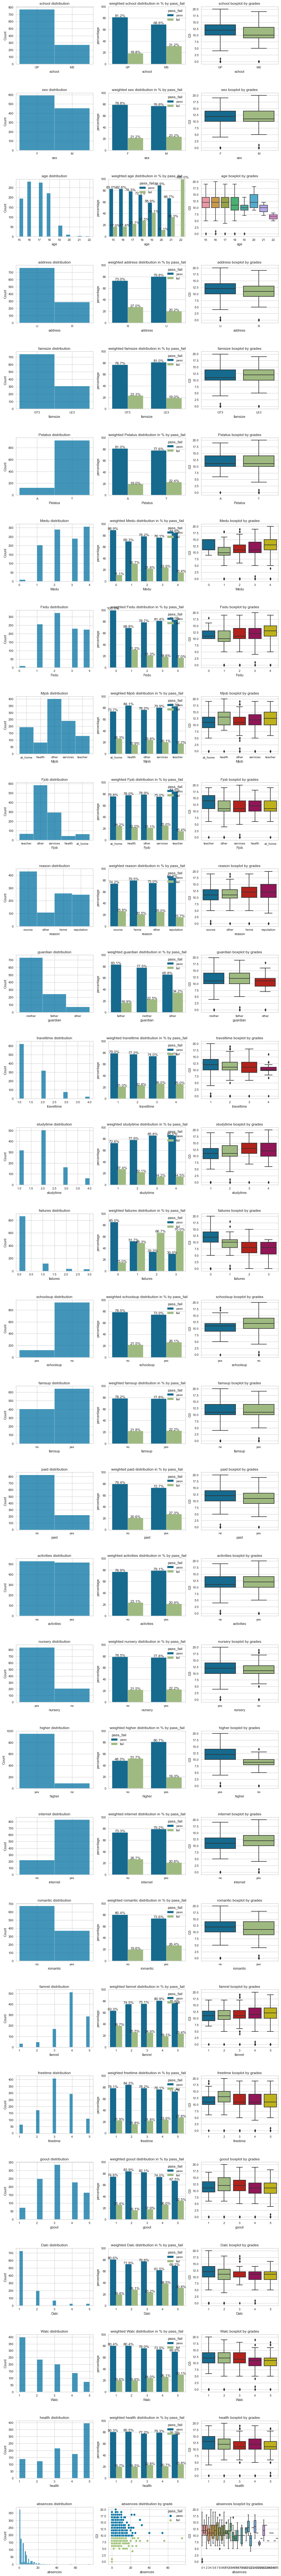

In [12]:
#Features analysis
plot_df = student_merge2.drop(["G3", "pass_fail"], axis=1)
fig, axes = plt.subplots(plot_df.shape[1], 3, figsize=(15, 150))
#for each features
for idx, col_name in enumerate(plot_df):
    ax = axes[idx]
    #values distribution for categorical and numerical features with few distinct values
    sns.histplot(plot_df[col_name], ax=ax[0])
    ax[0].set_title("{} distribution".format(col_name))
    #values distribution for "absences"
    if col_name == "absences":
        sns.scatterplot(data=plot_df, x=col_name, y=student_merge2.G3, hue=student_merge2.pass_fail, hue_order=["pass","fail"], ax=ax[1])
        ax[1].set_title("{} distribution by {}".format(col_name,"grade"))
    else:
        #weighted values distribution by pass_fail 
        pass_fail_perc = (student_merge2.groupby([col_name])['pass_fail']
                        .value_counts(normalize=True)
                        .rename('percentage')
                        .mul(100)
                        .reset_index())
        sns.barplot(x=col_name, y="percentage", hue="pass_fail", data=pass_fail_perc, hue_order=["pass","fail"], ax=ax[1])
        ax[1].set_ylim(bottom=0, top=100)
        ax[1].set_title("weighted {} distribution in % by {}".format(col_name,student_merge2.pass_fail.name))
        show_values(ax[1], percent=True)
    #boxplot per unique values by grades
    sns.boxplot(data=plot_df, x=col_name, y=student_merge2.G3, ax=ax[2])
    ax[2].set_title("{} boxplot by grades".format(col_name))
plt.subplots_adjust(hspace = 0.5)

#### Focus on Absences

In [13]:
print("Skeweness of absences features: {}".format(student_merge2["absences"].skew(axis = 0, skipna = True)))

Skeweness of absences features: 3.741346601057069


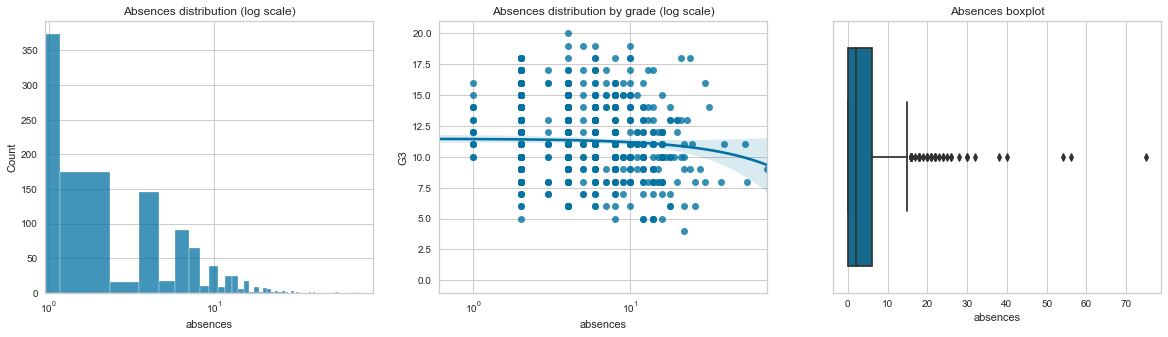

In [14]:
#Absences log scale
fig, axes = plt.subplots(1, 3, figsize=(20,5))
axes
sns.histplot(student_merge2["absences"], ax=axes[0])
axes[0].set(xscale="log")
axes[0].set_title("Absences distribution (log scale)")

sns.regplot(data=student_merge2, x="absences", y="G3", ax=axes[1],fit_reg=True)
axes[1].set(xscale="log")
axes[1].set_title("Absences distribution by grade (log scale)")

sns.boxplot(data=student_merge2, x="absences", ax=axes[2])
axes[2].set_title("Absences boxplot")

plt.subplots_adjust(hspace = 0.5)

#### Plot analysis

- ***school:*** the GP school has a higher rate of success and better grades.
- ***age:*** It's not clear, but it looks like being young can be an advantage. Also, there's a few students above 20yo, they should maybe be considered as outliers. 
- ***address:*** Living in a city gives an advantage. 
- ***Fedu/Medu:*** Both have an impact on the child's sucess in school. Better the parent's education, the better are the grades. Looking at the boxplot and the correlation matrix, it looks like the mother's education level has a greater impact than the father's. 
- ***Mjob/Fjob:*** "Teacher" is the best overall job for both parents. But "heatlh" is the best for the mother. 
- ***reason:*** Students who chooses their school by reputation, have a tendency to have better grades. Maybe they choose the GP school too. 
- ***guardien:*** Students who are not "raised" by at least one of their parents fail more. 
- ***faillure:*** Previous faillures have a huge impact on student success. 
- ***activities:*** Students with activities tend to have better results.
- ***higher:*** This feature has a huge impact on success. Since students who desire higher education need better grades.
- ***internet:*** It's an important success factor.
- ***romantic:*** Students within a romantic relationship have lower grades. Due to the distraction I assume.
- ***goout/Dalc/Walc:*** They are closely correlated and have a negative impact on the grades. Going out more increases the alcohol consumption, which negatively influences the grades. 
- ***absences:*** The data are skewed on the right. More absences tend to lower the grades, but not necessarely failing more. 

- ***sex/famsize/Pstatus/nursery/activities/famsup/schoolsup/traveltime/famrel/freetime/health:*** The distribution of values or the differences of grades between values, don't show a clear impact on the grades. Thus they should not be ignored. 

- ***famsup/schoolsup/paid:*** Need further analysis, since students tend to get support when they are struggling with the course. 

## Modeling
### Outlier

In [15]:
# We remove the statistical outliers by removing the highest x% values:
# 97% was the best choice for most of my tests
df = student_merge2.copy()
PERCENTILE_OUTLIERS = 97

columns =['absences', 'age', "failures", "G3"]

l = []
for col in columns:
    threshold = np.percentile(df[col], PERCENTILE_OUTLIERS)
    nb = sum(df[col] > threshold)
    l.append((int(nb), round(nb/len(df)*100, 2), threshold))

outliers = pd.DataFrame(l, index = columns, columns=('nb_outliers', '%_outliers', 'value'))
                  
outliers

,nb_outliers,%_outliers,value
absences,28,2.68,18.0
age,14,1.34,19.0
failures,30,2.87,2.0
G3,8,0.77,18.0


In [16]:
#I remove "absences" and "age" > 0.97 percentile
outliers_absences = outliers.iloc[0, 2]
outliers_age = outliers.iloc[1, 2]
#outlier_grade = 0


print("-- Outliers")
print("Size before deleting outliers: {}".format(df.shape[0]))
df = df.drop(df[((df.absences > outliers_absences) | (df.age > outliers_age))].index)# | (df.G3 == outlier_grade))].index)
print("Size after deleting outliers: {}".format(df.shape[0]))


-- Outliers
Size before deleting outliers: 1044
Size after deleting outliers: 968


- I checked for outliers in: absences, age, failures and G3
- I finally removed values from "absences" and "age" greater than the 97 percentile (absences > 18 & age > 19).
- I intended to remove the notes equal to 0, but I finally kept them because I didn't see any significant improvement.

### Classification

In [17]:
#unbalanced target class management
class_weights = class_weight.compute_class_weight('balanced',
                                                  np.unique(student_merge2.pass_fail),
                                                  student_merge2.pass_fail)                                            
class_weights = dict(enumerate(class_weights))
print(class_weights)

{0: 2.2695652173913046, 1: 0.6412776412776413}


In [18]:
#preprocessing pipeline & classifiers preparation

# def log_transform(x):
#     print(x)
#     return np.log(x + 1)
to_onehotencode_features = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]
to_onehotencode = OneHotEncoder() #for categorical features
to_standarscaler_features = ["age", "Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health","absences"]
to_standarscaler = StandardScaler() #for numerical features
# to_log_features = ["absences"]
# to_log = FunctionTransformer(log_transform)

#preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("standarscaler", to_standarscaler, to_standarscaler_features),
        ("onehotencod", to_onehotencode, to_onehotencode_features),
        #("log",to_log,to_log_features)
    ]
)

#list of classifiers to experiment (without tuning)
classifiers = [("LogisticRegression", LogisticRegression(class_weight=class_weights)),\
    ("SVC", SVC()),\
    ("DecisionTreeClassifier", DecisionTreeClassifier(class_weight=class_weights)),\
    ("RandomForestClassifier", RandomForestClassifier(class_weight=class_weights)),\
    ("GradientBoostingClassifier", GradientBoostingClassifier())]


In [19]:
#Training all classfiers and comparing results
list_score = []
for classifier in classifiers:
    clf = Pipeline(
        steps=[("preprocessor", preprocessor), classifier]
    )

    X = df.drop(["G3", "pass_fail"], axis=1)
    y = df.pass_fail.map({'pass': 1, 'fail': 0}).astype(int)

    scoring = {'accuracy': 'accuracy',
                'f1': 'f1'}
    cv = KFold(n_splits=5, random_state=None, shuffle=False)
    cv_score = cross_validate(estimator=clf, X=X, y=y, scoring=scoring, cv=cv, return_train_score=True)
    list_score.append([classifier[0],\
        cv_score['train_accuracy'].mean(),\
        cv_score['test_accuracy'].mean(),\
        cv_score['train_f1'].mean(),\
        cv_score['test_f1'].mean()])

df_score = pd.DataFrame(list_score, columns=['classifier', 'train_accuracy', 'test_accruracy', 'train_f1', 'test_f1'])
df_score.head()


,classifier,train_accuracy,test_accruracy,train_f1,test_f1
0,LogisticRegression,0.762402,0.701298,0.834669,0.789667
1,SVC,0.866478,0.818226,0.920541,0.889848
2,DecisionTreeClassifier,0.996126,0.723140,0.997504,0.817739
3,RandomForestClassifier,0.996126,0.762427,0.997505,0.855360
4,GradientBoostingClassifier,0.907025,0.795433,0.943308,0.872852


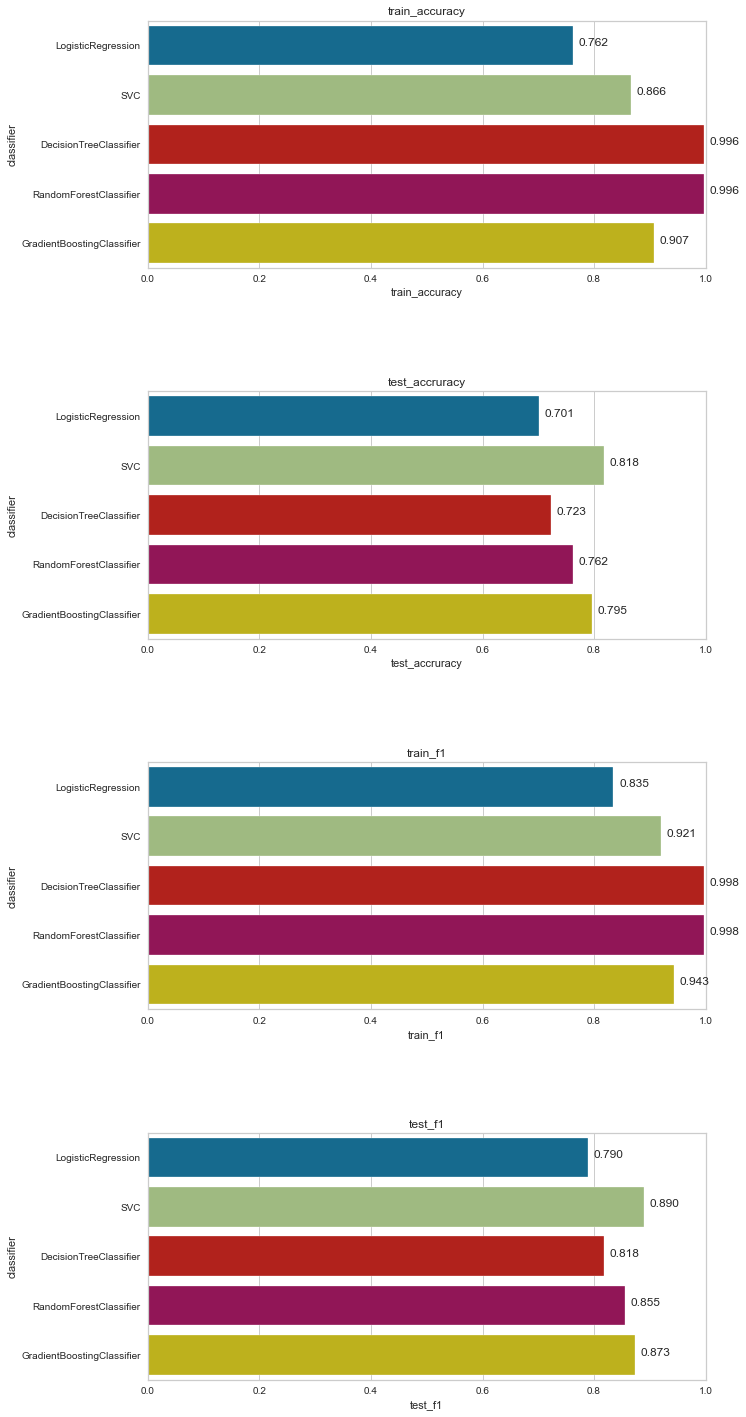

In [20]:
#Ploting results
plot_df = df_score.drop(["classifier"], axis= 1)
fig, axes = plt.subplots(plot_df.shape[1], 1, figsize=(10, 25))

for idx, col_name in enumerate(plot_df):
    ax = axes[idx]
    sns.barplot(data=plot_df, x=col_name, y=df_score.classifier, ax=ax)
    ax.set_xlim(left=0, right=1)
    ax.set_title(col_name)
    show_values(ax, orient="h")
plt.subplots_adjust(hspace = 0.5)


- The 3 models based on trees have a tendency to overfit, but gradient boosting is the tree classifier that performs the best without tuning. 
- The logistic regression has a low score compared to the others.
- Without any further tuning SVC is the most stable model with the best overall train and test score. 
- I believe that with additonal features processing and hyperparameter tuning GradientBoosting and SVC are the most suited models for this problem.
- And this quick modeling POC shows the great potential of this subject.

#### Ploting features importances based on GradientBoosting
It's not possible to get features importance with SVC. 

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

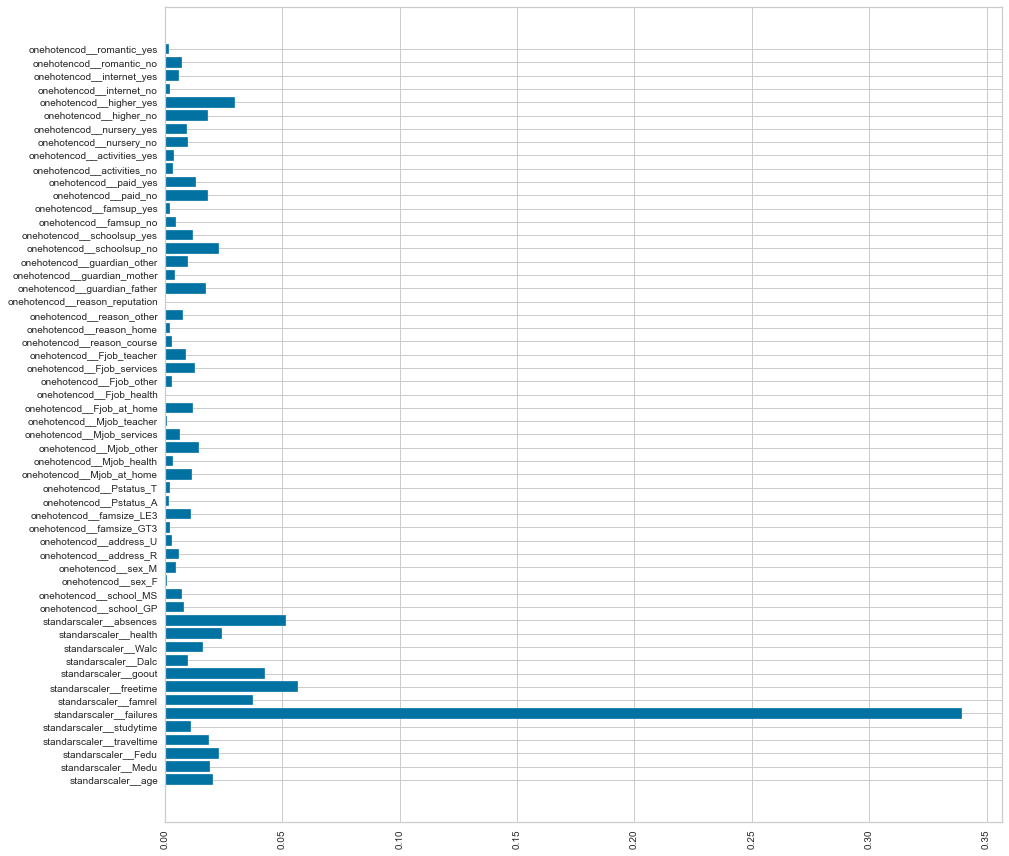

In [21]:
#Feature importances
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest_pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ("GradientBoostingClassifier", GradientBoostingClassifier())]
)
#feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest_pipeline.fit(X_train, y_train)
forest = forest_pipeline["GradientBoostingClassifier"]
importances = forest.feature_importances_
plt.figure(figsize=(15, 15))

#To get correct features name
feature_names= get_feature_names(preprocessor)
one_hot_col=["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]
for i in range(len(one_hot_col)):
    feature_names = [n.replace("_x"+str(i)+"_", "_"+one_hot_col[i]+"_") for n in feature_names]
  
plt.barh(feature_names, importances)
plt.xticks(rotation=90)

Top features:

1. failures
2. freetime
3. absences
4. goout
5. higher
6. Fedu & Medu





### Regression
Using automation quick modeling and hyperparameters tuning with pycaret

In [22]:
#Traning multiples regression models
caret_df = setup(data = df.drop(["pass_fail"], axis=1), target = "G3", session_id=55, numeric_features=["age", "Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "absences"])

,Description,Value
0,session_id,55
1,Target,G3
2,Original Data,"(968, 31)"
3,Missing Values,False
4,Numeric Features,13
5,Categorical Features,17
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(677, 43)"


In [23]:
compare_models() #Comparing model performances

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,2.3483,10.3752,3.1852,0.2973,0.5113,0.1915,0.1370
gbr,Gradient Boosting Regressor,2.4571,11.1445,3.3112,0.2412,0.5360,0.2000,0.0370
lightgbm,Light Gradient Boosting Machine,2.4754,11.1104,3.3075,0.2399,0.5257,0.2054,0.3650
br,Bayesian Ridge,2.5471,12.3148,3.4718,0.1732,0.5610,0.1995,0.0070
et,Extra Trees Regressor,2.5301,12.1721,3.4643,0.1727,0.5591,0.2065,0.1420
ridge,Ridge Regression,2.5984,12.5521,3.5032,0.1574,0.5623,0.2060,0.0060
omp,Orthogonal Matching Pursuit,2.5793,12.5245,3.5010,0.1572,0.5604,0.2054,0.0050
lr,Linear Regression,2.6013,12.5705,3.5058,0.1561,0.5625,0.2063,0.9100
lar,Least Angle Regression,2.6047,12.5898,3.5088,0.1545,0.5627,0.2067,0.0070
huber,Huber Regressor,2.5271,12.7887,3.5242,0.1504,0.5750,0.1989,0.0170


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=55, verbose=0, warm_start=False)

In [24]:
rf = create_model("rf") #Selecting and evaluating best models (Random Forest Regressor)
evaluate_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.6424,12.1733,3.4890,-0.0853,0.4342,0.2566
1,2.2224,8.6435,2.9400,0.3682,0.4862,0.1711
2,1.8816,6.1743,2.4848,0.4353,0.3044,0.1529
3,2.1246,7.0099,2.6476,0.4865,0.4393,0.1788
4,2.3682,11.1877,3.3448,0.3096,0.5869,0.1788
5,2.8134,17.3330,4.1633,0.1933,0.8104,0.1602
6,2.2535,8.9699,2.9950,0.4514,0.5322,0.1790
7,2.3536,11.7051,3.4213,0.2700,0.6340,0.1861
8,2.6493,12.7184,3.5663,0.2241,0.5932,0.2804
9,2.1739,7.8374,2.7995,0.3201,0.2926,0.1715


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

![title](img/pycaret_regression_feature_importance.png)

The feature importance looks similar to what I got with classification. 

## Conclusion

***To conclude, the perfect student is:***
<br/>A 15-16 years old student from GP school, living in a city with one of his parents and internet at home. 
The student wants to be highly educated like his parents and has a great relationship with them. The mother is working in healthcare and the father is a teacher. 
The student chose his school based on reputation.
He is studdying a lot and never failed or missed a class before.
He is not in a romantic relationship, has a bit of freetime and goes out without drinking alcohol.  
<br/>***But:***
<br/>Howerver, the goal is not to dictate the life of the student like forbidding them to have romantic relationships. There are also many factors which are beyond the control of the students and their families. We will therefore have to base our advice mainly on:
- Avoiding absences at school
- Understanding why GP school performs better
- Helping out students who failed classes before
- Encouraging study time
- preventing alcohol consumption

<br/>***Future:***
<br/><br/>After this analysis and the POC, we know that the idea of using the datas to predict and giving advices to students, is a great opportunity for them. With further analyses, it will be possible to build a product to increase awareness about success and failing factors, and raise the grades of students. 







